In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Student_Performance.csv")

In [3]:
df

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,12047,17,female,public,phd,1.8,55.2,yes,15-30 min,no,mixed,55.8,48.5,46.7,46.1,e
24996,1102,16,female,private,diploma,2.7,97.1,yes,<15 min,no,coaching,64.8,48.2,52.3,56.5,d
24997,4422,19,other,private,post graduate,1.0,63.0,yes,<15 min,no,group study,50.5,20.3,36.1,36.7,f
24998,7858,14,male,private,diploma,1.0,69.4,yes,15-30 min,yes,group study,13.0,34.2,7.3,34.1,f


In [4]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [5]:
df.shape

(25000, 16)

In [6]:
df.columns

Index(['student_id', 'age', 'gender', 'school_type', 'parent_education',
       'study_hours', 'attendance_percentage', 'internet_access',
       'travel_time', 'extra_activities', 'study_method', 'math_score',
       'science_score', 'english_score', 'overall_score', 'final_grade'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

In [8]:
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


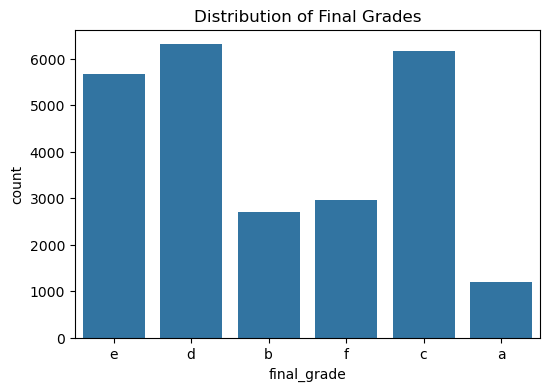

In [9]:
# Distribution of Final Grades
plt.figure(figsize=(6,4))
sns.countplot(x=df['final_grade'])
plt.title("Distribution of Final Grades")
plt.show()

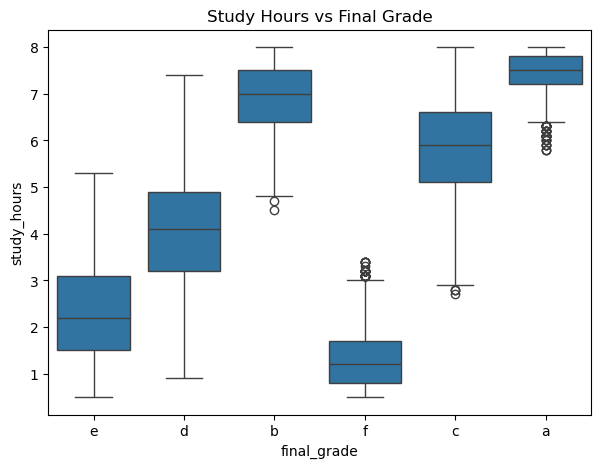

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(x='final_grade', y='study_hours', data=df)
plt.title("Study Hours vs Final Grade")
plt.show()

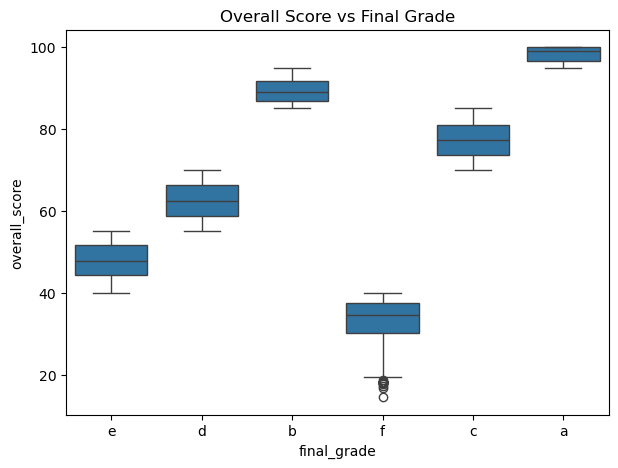

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(x='final_grade', y='overall_score', data=df)
plt.title("Overall Score vs Final Grade")
plt.show()

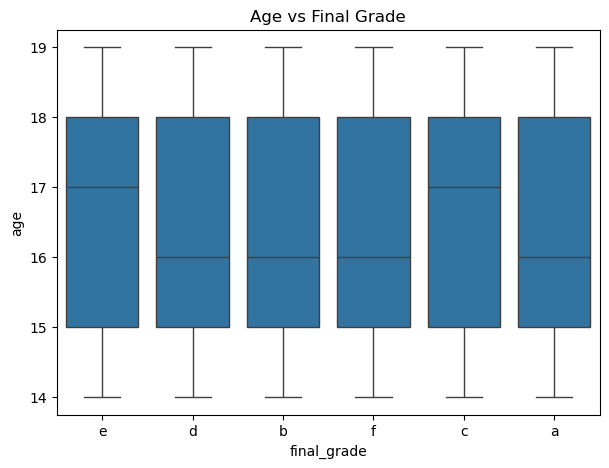

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(x='final_grade', y='age', data=df)
plt.title("Age vs Final Grade")
plt.show()

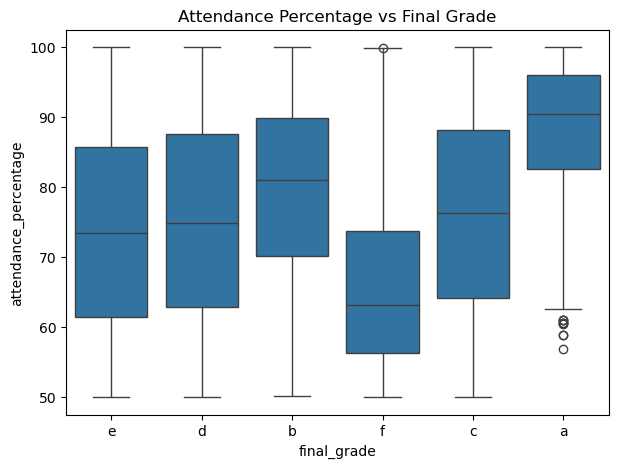

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(x='final_grade', y='attendance_percentage', data=df)
plt.title("Attendance Percentage vs Final Grade")
plt.show()

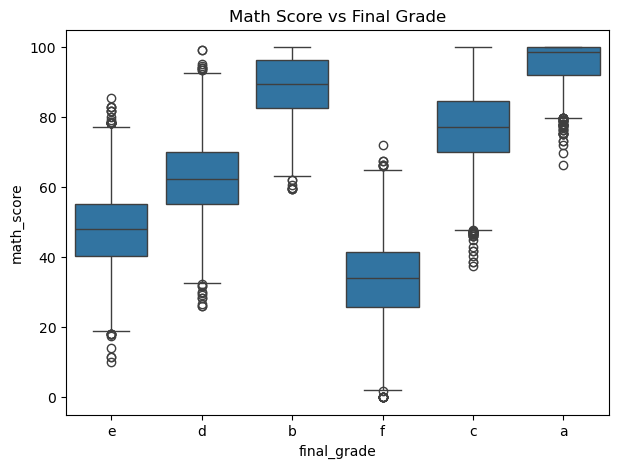

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(x='final_grade', y='math_score', data=df)
plt.title("Math Score vs Final Grade")
plt.show()

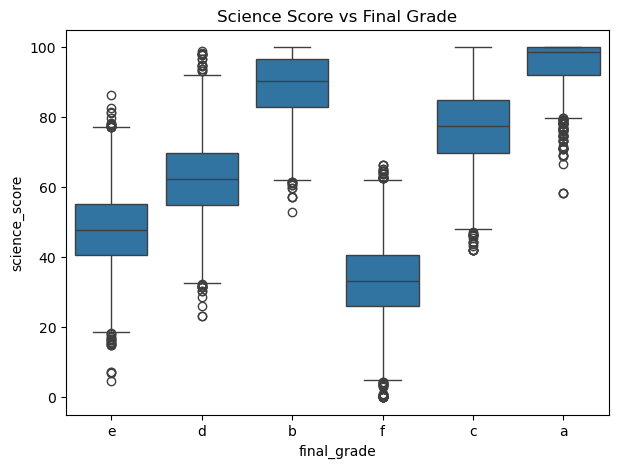

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(x='final_grade', y='science_score', data=df)
plt.title("Science Score vs Final Grade")
plt.show()

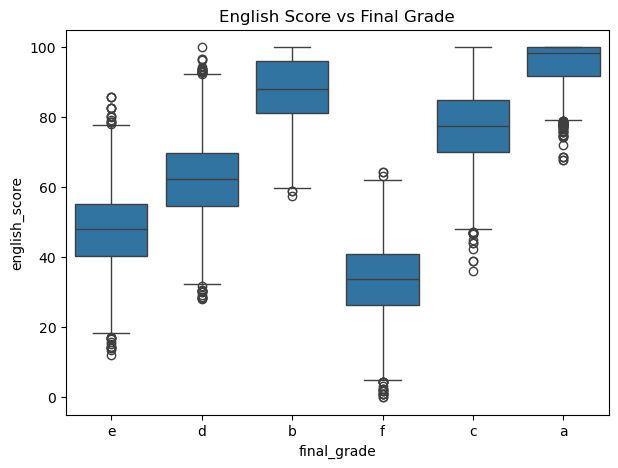

In [16]:
plt.figure(figsize=(7,5))
sns.boxplot(x='final_grade', y='english_score', data=df)
plt.title("English Score vs Final Grade")
plt.show()

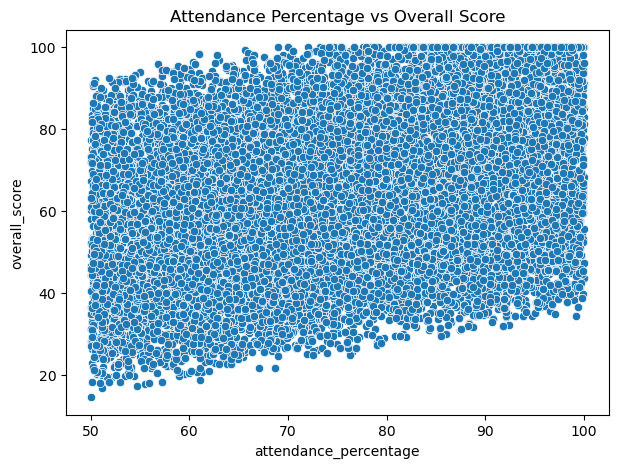

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='attendance_percentage', y='overall_score', data=df)
plt.title("Attendance Percentage vs Overall Score")
plt.show()

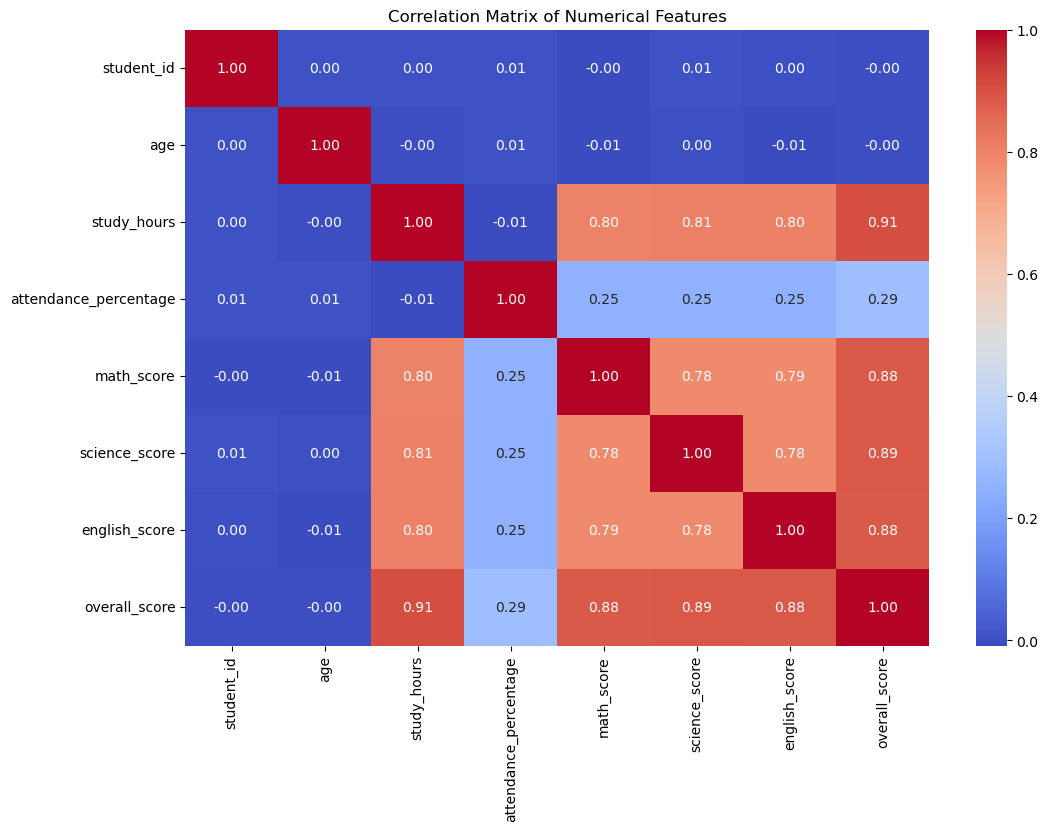

In [18]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [19]:
df['total_subject_score'] = df['math_score'] + df['science_score'] + df['english_score']
df[['math_score', 'science_score', 'english_score', 'total_subject_score']].head()

,math_score,science_score,english_score,total_subject_score
0,42.7,55.4,57.0,155.1
1,57.6,68.8,64.8,191.2
2,84.8,95.0,79.2,259.0
3,44.4,27.5,54.7,126.6
4,8.9,32.7,30.0,71.6


In [20]:
df['study_efficiency'] = df['overall_score'] / df['study_hours']
df[['study_hours', 'overall_score', 'study_efficiency']].head()

,study_hours,overall_score,study_efficiency
0,3.1,53.1,17.129032
1,3.7,61.3,16.567568
2,7.9,89.6,11.341772
3,1.1,41.6,37.818182
4,1.3,25.4,19.538462


In [21]:
# Converting categorical columns into numbers
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy();
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col]=le.fit_transform(df_encoded[col]);

In [22]:
df_encoded.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade,total_subject_score,study_efficiency
0,1,14,1,1,5,3.1,84.3,1,2,1,3,42.7,55.4,57.0,53.1,4,155.1,17.129032
1,2,18,0,1,1,3.7,87.8,1,3,0,5,57.6,68.8,64.8,61.3,3,191.2,16.567568
2,3,17,0,0,5,7.9,65.5,0,2,0,3,84.8,95.0,79.2,89.6,1,259.0,11.341772
3,4,16,2,1,2,1.1,58.1,0,0,0,3,44.4,27.5,54.7,41.6,4,126.6,37.818182
4,5,16,0,1,2,1.3,61.0,1,1,1,1,8.9,32.7,30.0,25.4,5,71.6,19.538462


In [23]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  int64  
 3   school_type            25000 non-null  int64  
 4   parent_education       25000 non-null  int64  
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  int64  
 8   travel_time            25000 non-null  int64  
 9   extra_activities       25000 non-null  int64  
 10  study_method           25000 non-null  int64  
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

In [24]:
# Separating Features(X) and target(y)
X = df_encoded.drop('final_grade',axis=1)
y = df_encoded['final_grade']

In [25]:
X.shape

(25000, 17)

In [26]:
y.shape

(25000,)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
X_train.shape

(20000, 17)

In [29]:
X_test.shape

(5000, 17)

In [30]:
# Feature Scaling - Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9626
Random Forest Accuracy: 0.9986
SVM Accuracy: 0.9434
Gradient Boosting Accuracy: 0.9986


In [32]:
final_model = GradientBoostingClassifier()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [33]:
final_accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.9986


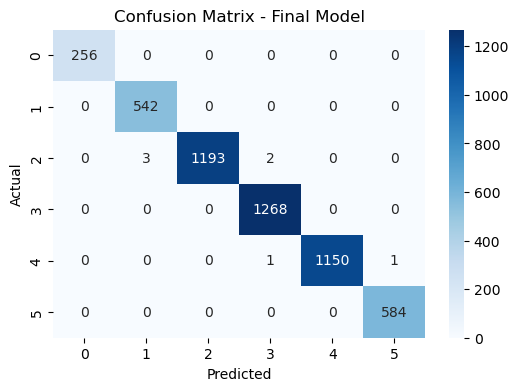

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       256
           1       0.99      1.00      1.00       542
           2       1.00      1.00      1.00      1198
           3       1.00      1.00      1.00      1268
           4       1.00      1.00      1.00      1152
           5       1.00      1.00      1.00       584

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [36]:
importances = final_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [37]:
feature_importance_df

,Feature,Importance
14,overall_score,9.989935e-01
12,science_score,2.282941e-04
15,total_subject_score,1.528027e-04
0,student_id,1.514675e-04
2,gender,1.106655e-04
16,study_efficiency,1.052129e-04
11,math_score,6.279655e-05
5,study_hours,6.053254e-05
6,attendance_percentage,3.712077e-05
13,english_score,3.558015e-05


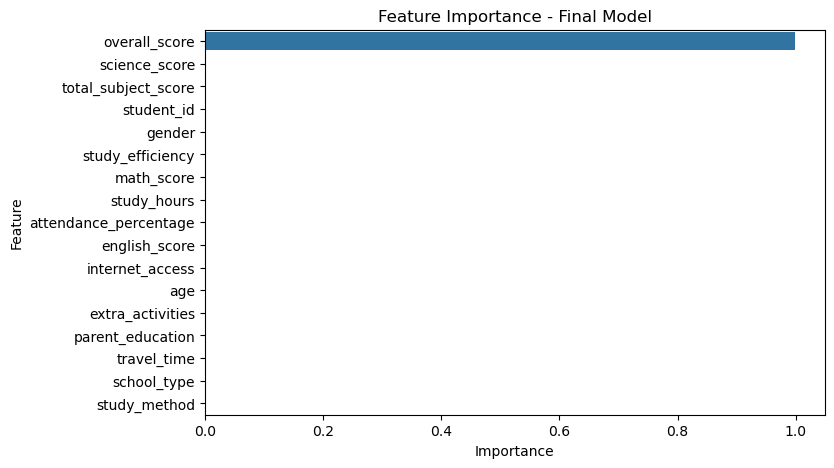

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - Final Model")
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(final_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.9982 0.9984 0.9976 1.     1.    ]
Mean CV Accuracy: 0.9988400000000001
